In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import stft

# Problem A

In [2]:
sin = []
N = 1000
SR = 1000 # Sample rate 1000
T = 1/SR
ks = [5,25,10,40] # Hz
amps = [5,12,10,7] # Amplitude of individual sine wave

In [3]:
x = np.linspace(0.0, N*T, N, endpoint=False)
for k,a in zip(ks,amps):
    sin.append(np.sin(k * 2.0*np.pi*x)*a)
sin = np.array(sin)

<Figure size 3000x1200 with 0 Axes>

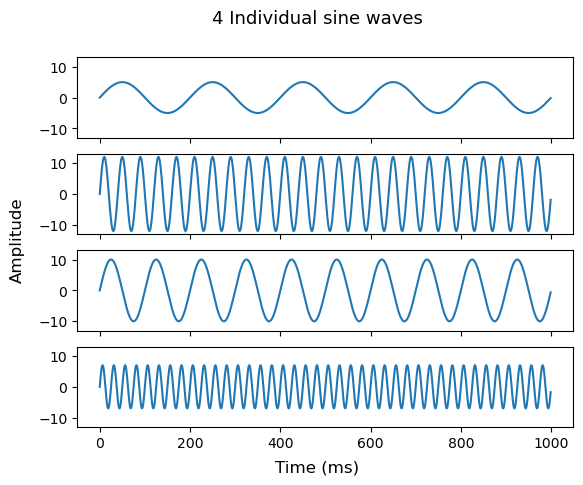

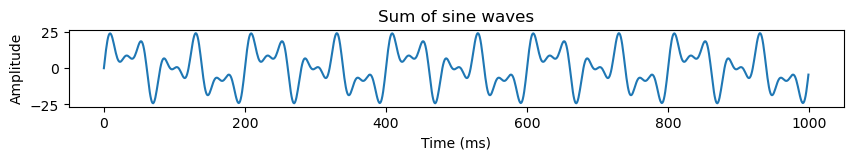

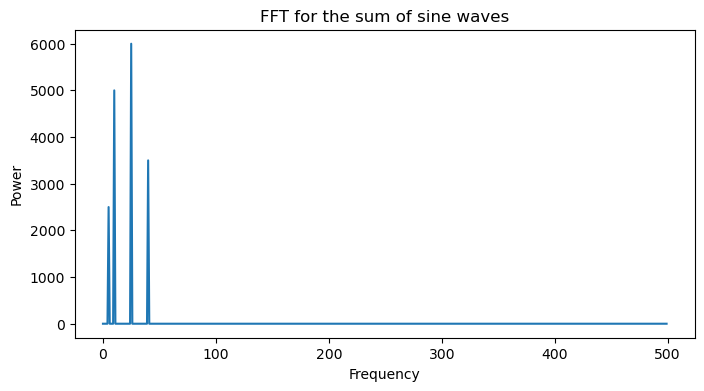

In [4]:
plt.figure(figsize=(10,4), dpi = 300)
fig,ax = plt.subplots(4,sharex='col')
for i,s in enumerate(sin):
    ax[i].plot(s)
    ax[i].set_ylim([-13, 13])
sum_sin = np.sum(sin, axis = 0)
fig.suptitle('4 Individual sine waves', fontsize=13)
fig.supxlabel('Time (ms)')
fig.supylabel('Amplitude')
plt.show()

plt.figure(figsize=(10,1), dpi = 100)
plt.plot(sum_sin)
plt.title('Sum of sine waves')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()

xf = fftfreq(N, T)[:N//2]
sum_sin_f = fft(sum_sin)
plt.figure(figsize=(8,4), dpi = 100)
plt.plot(xf, np.abs(sum_sin_f[:N//2]))
plt.title('FFT for the sum of sine waves')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# Problem B

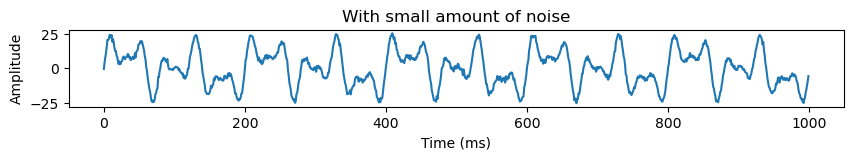

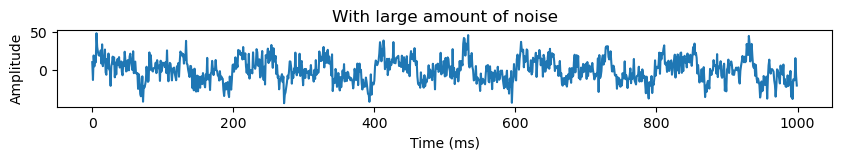

In [5]:
small_noise = sum_sin+np.random.normal(0,1,1000)
large_noise = sum_sin+np.random.normal(0,10,1000)

plt.figure(figsize=(10,1), dpi = 100)
plt.plot(small_noise)
plt.title('With small amount of noise')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10,1), dpi = 100)
plt.plot(large_noise)
plt.title('With large amount of noise')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()

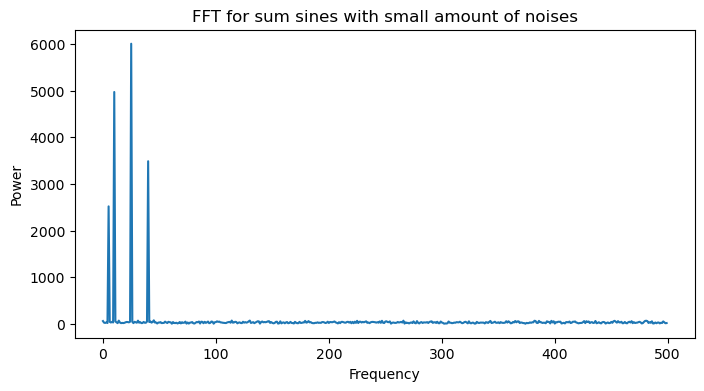

In [6]:
small_noise_f = fft(small_noise)
plt.figure(figsize=(8,4), dpi = 100)
plt.plot(xf, np.abs(small_noise_f[:N//2]))
plt.title('FFT for sum sines with small amount of noises')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

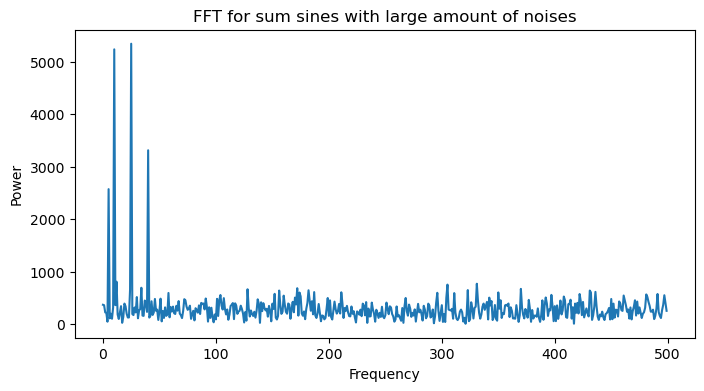

In [7]:
large_noise_f = fft(large_noise)
plt.figure(figsize=(8,4), dpi = 100)
plt.plot(xf, np.abs(large_noise_f[:N//2]))
plt.title('FFT for sum sines with large amount of noises')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

If no noises are in the signal, then its fft spectrum should have only 5 peaks, representing the 5 frequency of each individual sine wave. The remaining frequencies should have 0 power.
When added with `small amount` of noises, a small fluctuation can be noticed on the fft plot, representing the effect of the noises. This fluctuation can be hardly noticed in the time domain. Thus, with small amount of noises, the noises would be easier to be detected in the frequency domain.
When added with `large amount` of noises, the fluctuation representing the noises is more visible, but the noises are also obviously shown in the time domain. Thus, with large amount of noises, the noises are equally detectable in both domains.
In general, using the `frequency domain` to detect noises in signals may be `easier`.

# Problem C

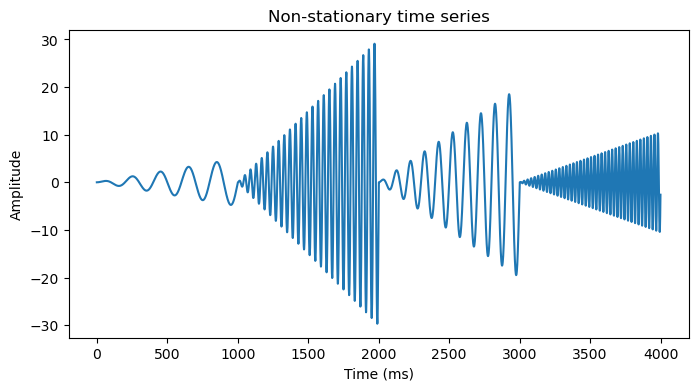

In [8]:
change_range = [1,2.5,2,1.5]

non_stat = []
for i,s in enumerate(sin):
    change_amp = np.linspace(0, change_range[i], N, endpoint=False)
    non_stat += list(s*change_amp)
non_stat = np.array(non_stat)
plt.figure(figsize=(8,4), dpi = 100)
plt.plot(non_stat)
plt.title('Non-stationary time series')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()

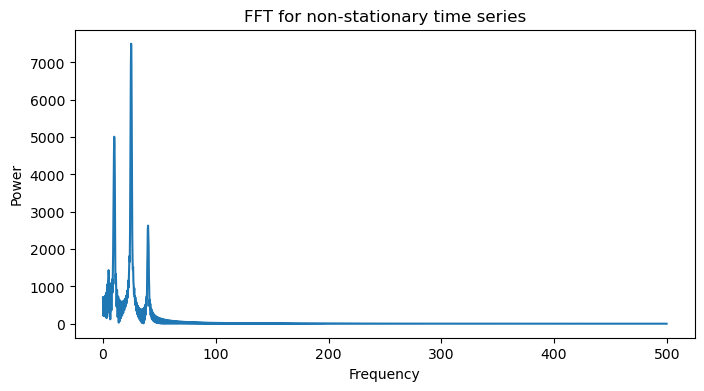

In [9]:
non_stat_f = fft(non_stat)
N_new = N*4
xf_new = fftfreq(N_new, T)[:N_new//2]
plt.figure(figsize=(8,4), dpi = 100)
plt.plot(xf_new, np.abs(non_stat_f[:N_new//2]))
plt.title('FFT for non-stationary time series')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# Problem D

In [10]:
def plot_stft(sig:np.ndarray, window_size:int, sample_rate = SR):
    f, t, Zxx = stft(sig, sample_rate, nperseg=window_size)
    plt.figure(figsize=(6,2), dpi = 100)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud',cmap=plt.cm.get_cmap('RdGy_r'))
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency')
    plt.xlabel('Time')
    plt.show()

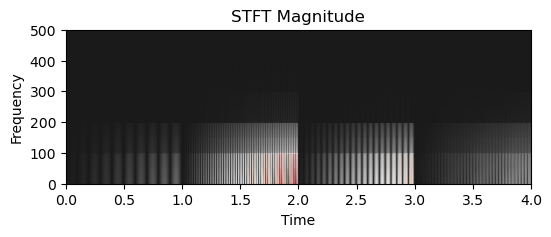

In [11]:
plot_stft(non_stat,10)

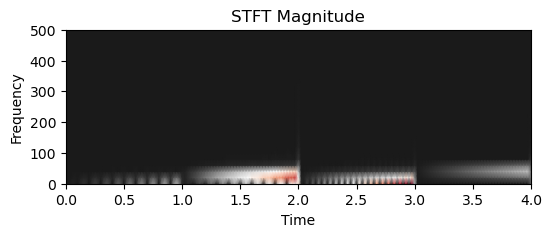

In [12]:
plot_stft(non_stat,50)

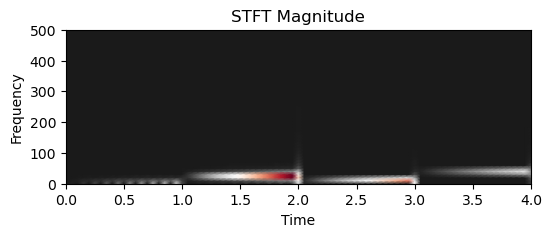

In [13]:
plot_stft(non_stat,100)

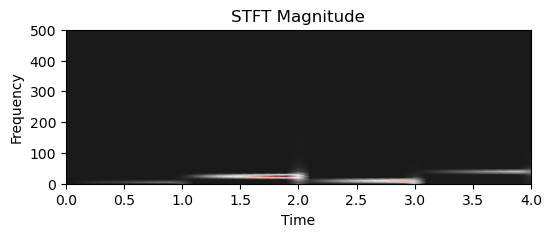

In [14]:
plot_stft(non_stat,200)

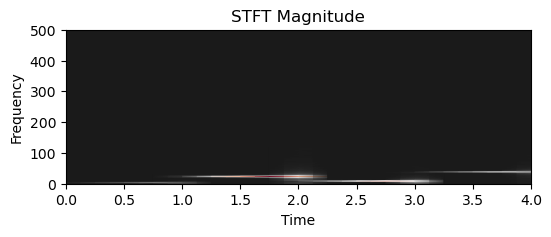

In [15]:
plot_stft(non_stat,500)

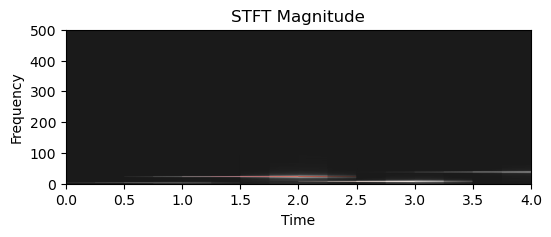

In [16]:
plot_stft(non_stat,1000)

From the results, we can observe that with smaller window size the segments are more detectable. The larger the window size, the thinner the vertical length representing each segment shown on the plot.

# Problem E
No information of the sampling rate is provided, so assuming using the sampling rate 512

In [17]:
import scipy.io
data = scipy.io.loadmat('dataset.mat')['eeg']
data = data.flatten()

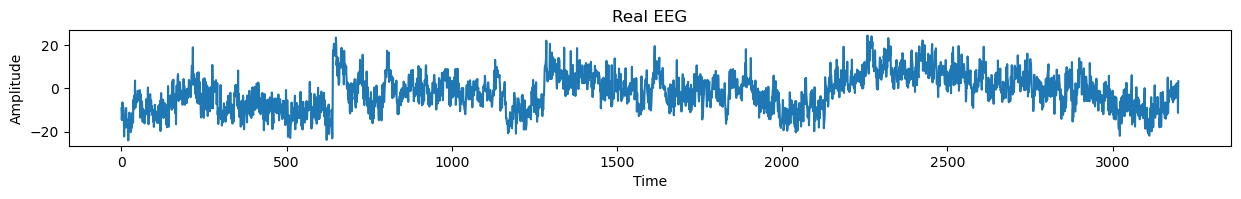

In [18]:
plt.figure(figsize=(15,1.5), dpi = 100)
plt.plot(data)
plt.title('Real EEG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

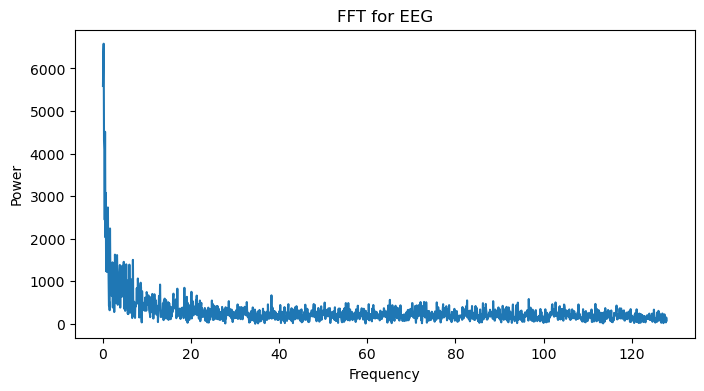

In [19]:
N = len(data)
sr = 512
T = 2/sr

x_data_f = fftfreq(N, T)[:N//2]
sig_f = fft(data)
plt.figure(figsize=(8,4), dpi = 100)
plt.plot(x_data_f, np.abs(sig_f[:N//2]))
plt.title('FFT for EEG')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

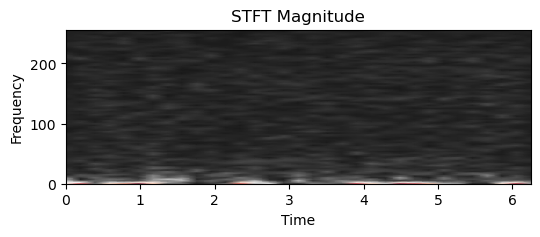

In [20]:
plot_stft(data,200,sr)

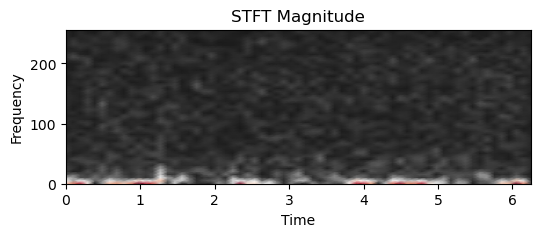

In [21]:
plot_stft(data,100,sr)

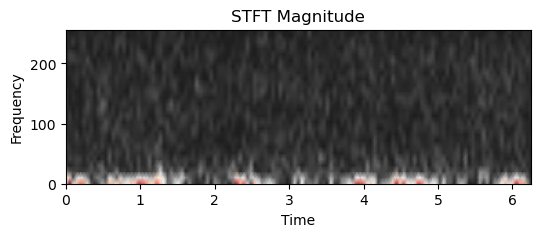

In [22]:
plot_stft(data,50,sr)

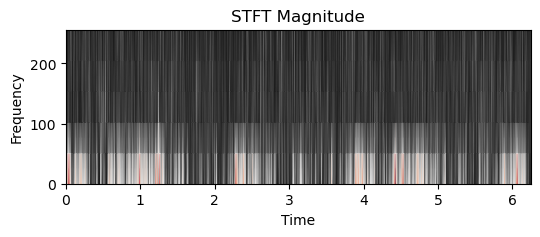

In [23]:
plot_stft(data,10,sr)

From the previous plots, I think 6 trails are included, Namely about (0-0.5), (0.5-2.2), (2.2-3.8), (3.8-4.4),(4.4-5.8), (5.8-end) based on the above plot.